In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-04-28/11-32-29/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. shape: 0.2159
	2. form: 0.2026
	3. figure: 0.1563
	4. locate: 0.1432
	5. shade: 0.1328
	6. up: 0.1277
	7. bottom: 0.1145
	8. blank: 0.0988
	9. cyan: 0.0924
	10. transparent: 0.0866
	11. lime: 0.0801
	12. azure: 0.0795
	13. green: 0.0758
	14. right: 0.0721
	15. color: 0.0690
	16. quadratic: 0.0682
	17. left: 0.0676
	18. red: 0.0669
	19. unrotate: 0.0648
	20. scarlet: 0.0637
	21. unturn: 0.0558
	22. crimson: 0.0558
	23. in: 0.0557
	24. solid: 0.0511
	25. <pad>: 0.0501
	26. no: 0.0480
	27. white: 0.0479
	28. picture: 0.0465
	29. four: 0.0460
	30. photo: 0.0455
	31. outline: 0.0444
	32. position: 0.0419
	33. with: 0.0377
	34. canvas: 0.0365
	35. circular: 0.0362
	36. static: 0.0344
	37. angle: 0.0318
	38. turn: 0.0305
	39. triangular: 0.0304
	40. olive: 0.0296
	41. round: 0.0295
	42. background: 0.0283
	43. blue: 0.0274
	44. rotate: 0.0255
	45. image: 0.0244
	46. three: 0.0220
	47. fix: 0.0203
	48. corner: 0.0146
	49. have: 0.008

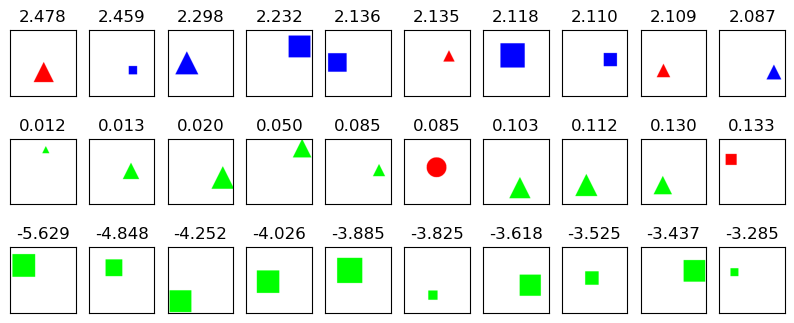

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. that: 0.4979
	2. this: 0.4952
	3. the: 0.4721
	4. background: 0.1137
	5. canvas: 0.0974
	6. <pad>: 0.0831
	7. lime: 0.0788
	8. green: 0.0733
	9. solid: 0.0700
	10. with: 0.0694
	11. triangular: 0.0681
	12. photo: 0.0555
	13. three: 0.0506
	14. no: 0.0498
	15. unturn: 0.0488
	16. round: 0.0448
	17. white: 0.0442
	18. circular: 0.0382
	19. transparent: 0.0358
	20. image: 0.0327
	21. picture: 0.0320
	22. blank: 0.0306
	23. red: 0.0273
	24. cyan: 0.0257
	25. outline: 0.0220
	26. azure: 0.0215
	27. shade: 0.0212
	28. right: 0.0211
	29. scarlet: 0.0198
	30. static: 0.0174
	31. crimson: 0.0168
	32. angle: 0.0165
	33. shape: 0.0145
	34. quadratic: 0.0130
	35. bottom: 0.0112
	36. left: 0.0111
	37. rotate: 0.0110
	38. turn: 0.0096
	39. four: 0.0083
	40. locate: 0.0083
	41. corner: 0.0072
	42. in: 0.0065
	43. up: 0.00

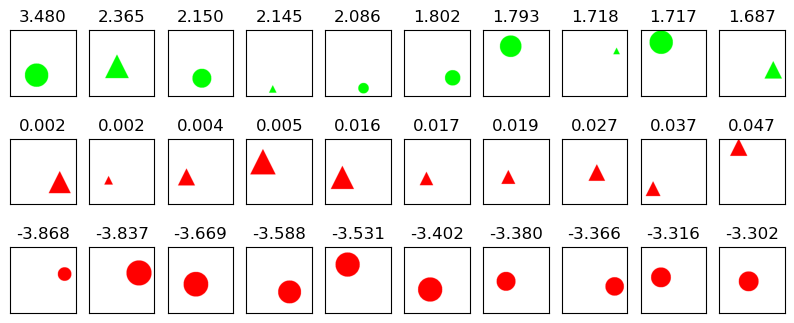

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. blue: 0.2353
	2. corner: 0.2265
	3. color: 0.1515
	4. outline: 0.1506
	5. fix: 0.1387
	6. static: 0.1343
	7. turn: 0.1292
	8. angle: 0.1198
	9. rotate: 0.1135
	10. olive: 0.1096
	11. right: 0.1057
	12. unturn: 0.1010
	13. unrotate: 0.1008
	14. position: 0.1001
	15. white: 0.0967
	16. image: 0.0949
	17. picture: 0.0922
	18. azure: 0.0848
	19. left: 0.0806
	20. four: 0.0802
	21. crimson: 0.0726
	22. red: 0.0716
	23. with: 0.0705
	24. in: 0.0699
	25. scarlet: 0.0656
	26. green: 0.0634
	27. lime: 0.0625
	28. triangular: 0.0609
	29. <pad>: 0.0590
	30. solid: 0.0582
	31. bottom: 0.0572
	32. cyan: 0.0565
	33. locate: 0.0543
	34. photo: 0.0521
	35. circular: 0.0495
	36. blank: 0.0471
	37. no: 0.0462
	38. three: 0.0461
	39. round: 0.0460
	40. quadratic: 0.0423
	41. shade: 0.0408
	42. up: 0.0398
	43. transparent: 0.0

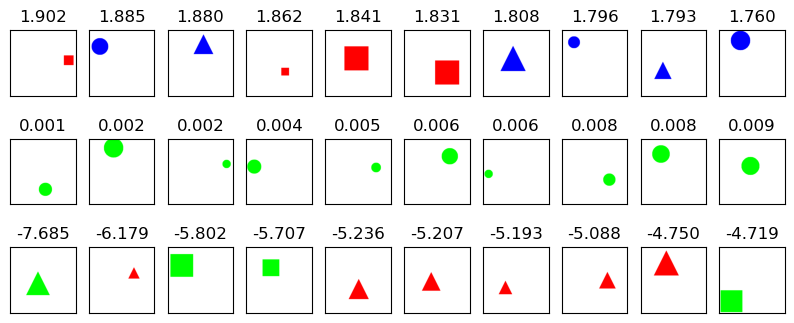

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. figure: 0.2058
	2. form: 0.1952
	3. shape: 0.1689
	4. up: 0.1622
	5. quadratic: 0.1480
	6. bottom: 0.1348
	7. color: 0.1291
	8. locate: 0.1253
	9. shade: 0.1251
	10. four: 0.1171
	11. cyan: 0.1095
	12. azure: 0.1072
	13. blank: 0.0871
	14. crimson: 0.0789
	15. lime: 0.0778
	16. unrotate: 0.0775
	17. green: 0.0694
	18. transparent: 0.0690
	19. scarlet: 0.0648
	20. in: 0.0622
	21. blue: 0.0588
	22. no: 0.0568
	23. right: 0.0541
	24. olive: 0.0533
	25. red: 0.0521
	26. left: 0.0516
	27. outline: 0.0506
	28. white: 0.0504
	29. position: 0.0457
	30. with: 0.0402
	31. <pad>: 0.0401
	32. unturn: 0.0366
	33. circular: 0.0361
	34. static: 0.0342
	35. canvas: 0.0315
	36. round: 0.0305
	37. turn: 0.0295
	38. picture: 0.0290
	39. fix: 0.0261
	40. rotate: 0.0257
	41. photo: 0.0251
	42. angle: 0.0235
	43. background: 0.0

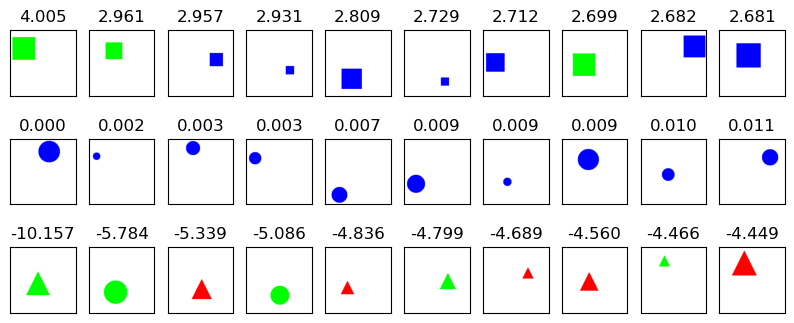

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. is: 0.3343
	2. have: 0.3053
	3. olive: 0.1737
	4. background: 0.1411
	5. canvas: 0.1393
	6. turn: 0.0983
	7. rotate: 0.0962
	8. in: 0.0934
	9. angle: 0.0892
	10. three: 0.0863
	11. crimson: 0.0751
	12. quadratic: 0.0711
	13. scarlet: 0.0660
	14. photo: 0.0604
	15. outline: 0.0597
	16. green: 0.0590
	17. <pad>: 0.0569
	18. image: 0.0556
	19. transparent: 0.0550
	20. blue: 0.0538
	21. cyan: 0.0507
	22. azure: 0.0494
	23. position: 0.0476
	24. lime: 0.0442
	25. static: 0.0423
	26. right: 0.0414
	27. red: 0.0392
	28. with: 0.0373
	29. picture: 0.0349
	30. triangular: 0.0332
	31. unturn: 0.0326
	32. white: 0.0319
	33. unrotate: 0.0294
	34. no: 0.0277
	35. solid: 0.0263
	36. blank: 0.0251
	37. left: 0.0211
	38. four: 0.0201
	39. bottom: 0.0201
	40. round: 0.0190
	41. shade: 0.0174
	42. fix: 0.0162
	43. up: 0.0130

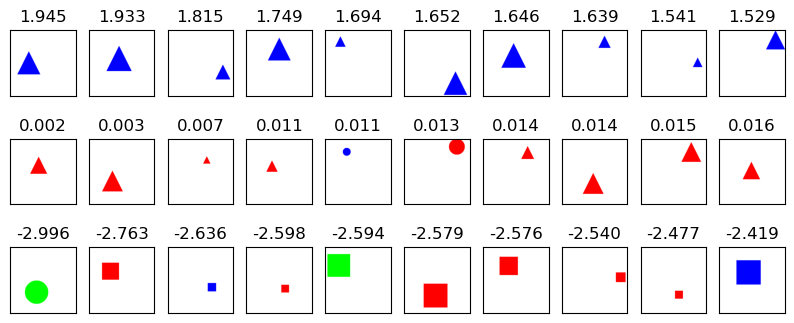

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. the: 0.4910
	2. that: 0.4766
	3. this: 0.4764
	4. <pad>: 0.1023
	5. green: 0.0957
	6. lime: 0.0861
	7. with: 0.0856
	8. triangular: 0.0733
	9. canvas: 0.0714
	10. three: 0.0694
	11. background: 0.0687
	12. solid: 0.0554
	13. photo: 0.0459
	14. unturn: 0.0457
	15. no: 0.0434
	16. white: 0.0408
	17. circular: 0.0374
	18. round: 0.0370
	19. picture: 0.0348
	20. image: 0.0304
	21. outline: 0.0298
	22. transparent: 0.0294
	23. azure: 0.0284
	24. blank: 0.0275
	25. cyan: 0.0262
	26. angle: 0.0261
	27. red: 0.0252
	28. scarlet: 0.0229
	29. shade: 0.0194
	30. right: 0.0187
	31. static: 0.0183
	32. shape: 0.0151
	33. quadratic: 0.0145
	34. left: 0.0122
	35. rotate: 0.0121
	36. crimson: 0.0119
	37. four: 0.0109
	38. corner: 0.0104
	39. bottom: 0.0094
	40. turn: 0.0094
	41. locate: 0.0092
	42. in: 0.0071
	43. up: 0.00

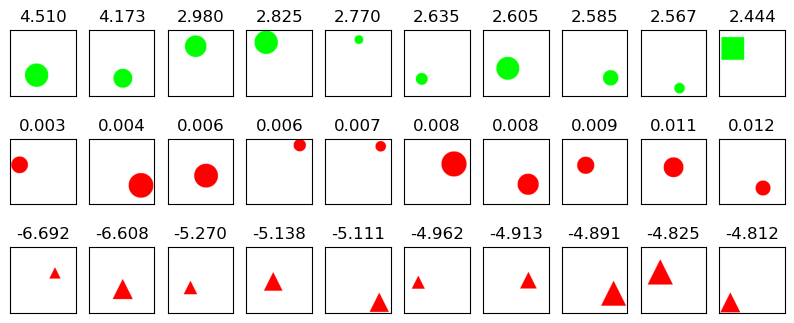

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. fix: 0.1765
	2. corner: 0.1512
	3. image: 0.1469
	4. solid: 0.1411
	5. position: 0.1389
	6. left: 0.1329
	7. static: 0.1307
	8. triangular: 0.1290
	9. picture: 0.1290
	10. rotate: 0.1223
	11. red: 0.1208
	12. photo: 0.1171
	13. unturn: 0.1127
	14. angle: 0.1119
	15. unrotate: 0.1045
	16. scarlet: 0.1045
	17. turn: 0.0997
	18. right: 0.0964
	19. round: 0.0905
	20. circular: 0.0894
	21. crimson: 0.0890
	22. white: 0.0839
	23. in: 0.0797
	24. three: 0.0787
	25. transparent: 0.0677
	26. outline: 0.0653
	27. blank: 0.0599
	28. color: 0.0562
	29. bottom: 0.0542
	30. with: 0.0526
	31. four: 0.0514
	32. shade: 0.0509
	33. locate: 0.0499
	34. no: 0.0449
	35. blue: 0.0438
	36. background: 0.0416
	37. up: 0.0390
	38. canvas: 0.0373
	39. azure: 0.0368
	40. olive: 0.0333
	41. lime: 0.0313
	42. <pad>: 0.0312
	43. cyan: 0

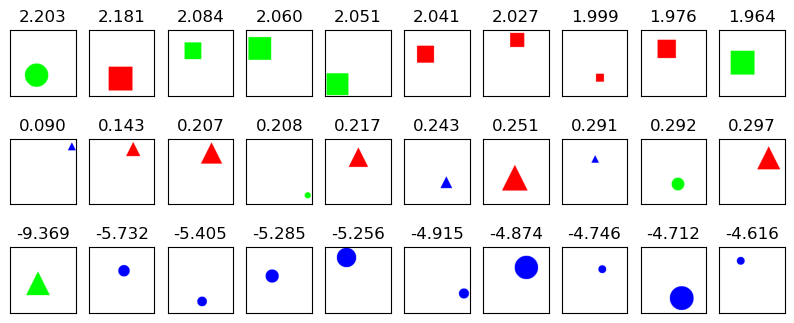

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. no: 0.2537
	2. with: 0.2330
	3. <pad>: 0.2066
	4. four: 0.1442
	5. three: 0.1385
	6. cyan: 0.1366
	7. round: 0.1322
	8. lime: 0.1258
	9. green: 0.1197
	10. background: 0.1187
	11. azure: 0.1172
	12. canvas: 0.1165
	13. outline: 0.0850
	14. blue: 0.0844
	15. quadratic: 0.0838
	16. circular: 0.0831
	17. crimson: 0.0668
	18. white: 0.0663
	19. triangular: 0.0501
	20. photo: 0.0494
	21. transparent: 0.0430
	22. olive: 0.0413
	23. scarlet: 0.0400
	24. blank: 0.0396
	25. shade: 0.0366
	26. image: 0.0355
	27. red: 0.0288
	28. picture: 0.0287
	29. turn: 0.0273
	30. unturn: 0.0266
	31. angle: 0.0252
	32. right: 0.0243
	33. rotate: 0.0242
	34. static: 0.0219
	35. solid: 0.0208
	36. bottom: 0.0204
	37. in: 0.0203
	38. color: 0.0179
	39. unrotate: 0.0157
	40. up: 0.0138
	41. locate: 0.0131
	42. corner: 0.0125
	43. posi

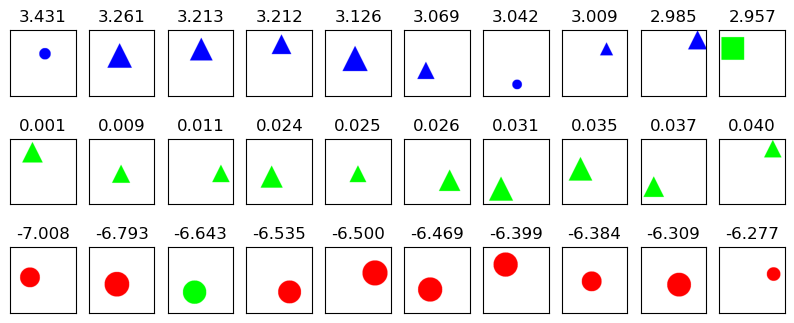

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. round: 0.3552
	2. no: 0.3358
	3. three: 0.2558
	4. circular: 0.2503
	5. with: 0.2192
	6. background: 0.1830
	7. <pad>: 0.1826
	8. canvas: 0.1393
	9. four: 0.1282
	10. triangular: 0.0953
	11. photo: 0.0867
	12. transparent: 0.0736
	13. lime: 0.0735
	14. crimson: 0.0622
	15. cyan: 0.0547
	16. white: 0.0536
	17. green: 0.0465
	18. image: 0.0456
	19. shade: 0.0452
	20. blank: 0.0445
	21. scarlet: 0.0423
	22. quadratic: 0.0413
	23. red: 0.0337
	24. solid: 0.0325
	25. azure: 0.0300
	26. picture: 0.0264
	27. unturn: 0.0162
	28. outline: 0.0153
	29. rotate: 0.0139
	30. right: 0.0137
	31. turn: 0.0133
	32. bottom: 0.0124
	33. position: 0.0118
	34. unrotate: 0.0113
	35. static: 0.0108
	36. blue: 0.0104
	37. in: 0.0097
	38. left: 0.0096
	39. olive: 0.0091
	40. up: 0.0087
	41. angle: 0.0074
	42. fix: 0.0073
	43. locate

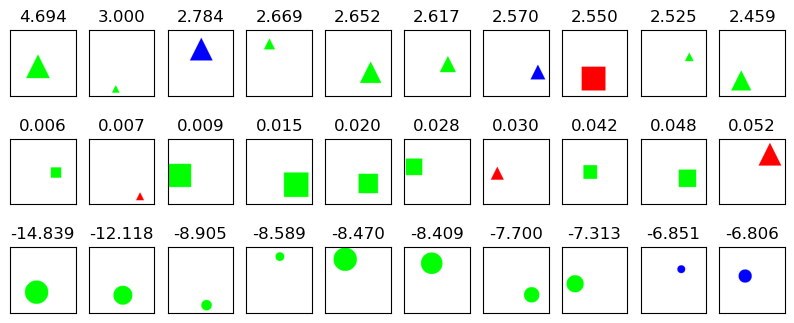

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. have: 0.3001
	2. is: 0.2904
	3. olive: 0.1348
	4. canvas: 0.1114
	5. angle: 0.0985
	6. background: 0.0973
	7. in: 0.0972
	8. turn: 0.0967
	9. green: 0.0951
	10. outline: 0.0928
	11. quadratic: 0.0880
	12. cyan: 0.0825
	13. azure: 0.0809
	14. rotate: 0.0764
	15. <pad>: 0.0706
	16. blue: 0.0676
	17. lime: 0.0629
	18. right: 0.0608
	19. three: 0.0546
	20. transparent: 0.0539
	21. photo: 0.0515
	22. crimson: 0.0493
	23. image: 0.0451
	24. static: 0.0451
	25. unturn: 0.0433
	26. scarlet: 0.0412
	27. picture: 0.0400
	28. position: 0.0388
	29. with: 0.0374
	30. white: 0.0361
	31. blank: 0.0345
	32. unrotate: 0.0321
	33. bottom: 0.0319
	34. solid: 0.0302
	35. red: 0.0277
	36. no: 0.0243
	37. shape: 0.0237
	38. left: 0.0229
	39. triangular: 0.0223
	40. up: 0.0222
	41. four: 0.0202
	42. locate: 0.0189
	43. shade: 0.

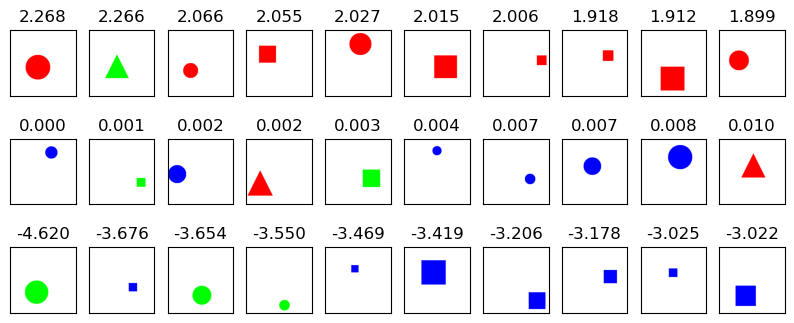

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. circular: 0.1491
	2. blank: 0.1171
	3. four: 0.1114
	4. locate: 0.1111
	5. left: 0.1078
	6. round: 0.1029
	7. white: 0.1013
	8. up: 0.0970
	9. figure: 0.0954
	10. unrotate: 0.0949
	11. bottom: 0.0908
	12. transparent: 0.0895
	13. shade: 0.0856
	14. with: 0.0840
	15. no: 0.0822
	16. unturn: 0.0816
	17. picture: 0.0810
	18. triangular: 0.0809
	19. solid: 0.0763
	20. right: 0.0758
	21. color: 0.0745
	22. fix: 0.0732
	23. position: 0.0724
	24. form: 0.0717
	25. photo: 0.0644
	26. red: 0.0643
	27. static: 0.0642
	28. shape: 0.0626
	29. <pad>: 0.0598
	30. scarlet: 0.0582
	31. corner: 0.0580
	32. image: 0.0532
	33. lime: 0.0524
	34. in: 0.0514
	35. three: 0.0504
	36. outline: 0.0499
	37. quadratic: 0.0472
	38. crimson: 0.0471
	39. azure: 0.0463
	40. cyan: 0.0446
	41. green: 0.0412
	42. rotate: 0.0403
	43. angle: 

IndexError: list index out of range

In [5]:
for i in range(51):
    visualize_concept(i)